# Bike sharing regression analysis

### Problem statement

As an operator of a bike sharing business, I want to **maximize utilisation of the service during lean demand periods** which can facilitate the goal of increasing the share of bike mode as means of travel. To that end, I want to develop an incentive scheme, which can be monetary or non-monetary, so as to encourage people to take up bike sharing. To develop such a scheme, it is essential **to understand when users choose to/not to use the service using the data I have**

### TODO:
1) **Data Cleaning & Processing** : Detecting and correcting (or removing) corrupt or Inaccurate records that may distort the results.

2) **Visualization**: Use suitable graphs/visualisations to explore the given data. Explain how these visualisations will be useful in developing a suitable incentive scheme.

3) **Data Modeling**: Identify the factors that have impact on the demand for bike sharing services and  suggest an incentive scheme based on your observations.

4) You may choose to extract additional contextual information through the web (like events) which might improve the scheme. 

5) Sharing Features engineered which are hypothesized in your data modeling.  Note: Feature Engineering contribute the highest to a better prediction. https://en.wikipedia.org/wiki/Feature_engineering

### Dataset
A data set containing two-year historical log corresponding to years 2011 and 2012.

The dataset contains following variables :

• instant: record index

• dteday : date

• season : season (1:spring, 2:summer, 3:fall, 4:winter)

• yr : year (0: 2011, 1:2012)

• mnth : month ( 1 to 12)

• hr : hour (0 to 23)

• holiday : whether day is holiday or not

• weekday : day of the week

• workingday : if day is neither weekend nor holiday = 1, otherwise = 0.

• weathersit :

• 1: Clear, Few clouds, Partly cloudy, Partly cloudy

• 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

• 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

• 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

• temp : Normalized temperature in Celsius. The values are divided to 41 (max)

• atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

• hum: Normalized humidity. The values are divided to 100 (max)

• windspeed: Normalized wind speed. The values are divided to 67 (max)

• casual: count of casual users

• registered: count of registered users

• cnt: count of total rental bikes including both casual and registered


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
day_df = pd.read_csv('./day.csv')
hour_df = pd.read_csv('./hour.csv')

In [11]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [10]:
for i in range(23):
    hour_df[hour_df['hr']==i]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
25,26,2011-01-02,1,0,1,1,0,0,0,2,0.44,0.4394,0.94,0.2537,1,16,17
48,49,2011-01-03,1,0,1,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,2,2
70,71,2011-01-04,1,0,1,1,0,2,1,1,0.16,0.1818,0.59,0.1045,0,2,2
93,94,2011-01-05,1,0,1,1,0,3,1,1,0.16,0.1970,0.74,0.0896,0,6,6
116,117,2011-01-06,1,0,1,1,0,4,1,1,0.16,0.2273,0.64,0.0000,0,4,4
139,140,2011-01-07,1,0,1,1,0,5,1,2,0.20,0.1970,0.69,0.2239,2,5,7
162,163,2011-01-08,1,0,1,1,0,6,0,2,0.18,0.2121,0.55,0.0896,1,15,16
186,187,2011-01-09,1,0,1,1,0,0,0,1,0.10,0.0606,0.42,0.4627,0,12,12
210,211,2011-01-10,1,0,1,1,0,1,1,1,0.12,0.1212,0.50,0.2836,1,0,1


In [3]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

In [10]:
ax1.scatter(day_df['season'], day_df['cnt'])

NameError: name 'ax1' is not defined

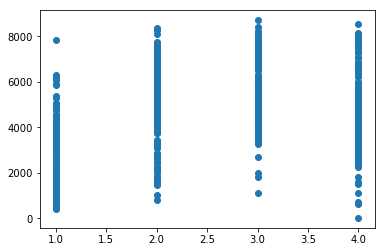

In [29]:
plt.show()

In [37]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax1.scatter(day_df['atemp'], day_df['cnt'])
ax2.scatter(day_df['temp'], day_df['cnt'])

plt.title('Real Temperature vs. Perceived Temperature')
plt.xlabel('Normalized temperature')
plt.ylabel('Total rental per day')
plt.legend()


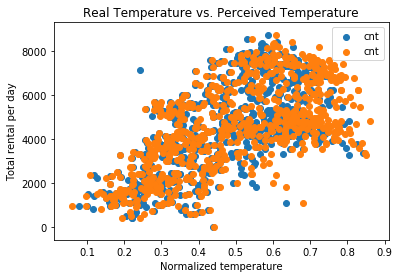

In [38]:
plt.show()
# temperature and 'perceived temperature' appears to have similar effect. We could drop one of the 

In [3]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax1.scatter(day_df['atemp'], day_df['casual'])
ax2.scatter(day_df['temp'], day_df['casual'])

plt.title('Real Temperature vs. Perceived Temperature')
plt.xlabel('Normalized temperature')
plt.ylabel('Total rental per day by casuals')
plt.legend()


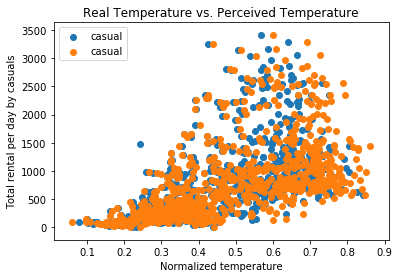

In [4]:
plt.show()

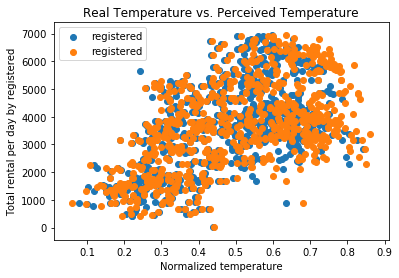

In [5]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax1.scatter(day_df['atemp'], day_df['registered'])
ax2.scatter(day_df['temp'], day_df['registered'])

plt.title('Real Temperature vs. Perceived Temperature')
plt.xlabel('Normalized temperature')
plt.ylabel('Total rental per day by registered')
plt.legend()

plt.show()

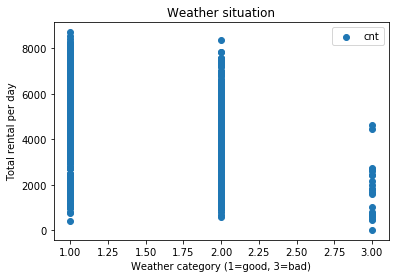

In [45]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(day_df['weathersit'], day_df['cnt'])

plt.title('Weather situation')
plt.xlabel('Weather category (1=good, 3=bad)')
plt.ylabel('Total rental per day')
plt.legend()
plt.show()

# bike sales are terrible when weather situation == 3 

### Building our linear regression model

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
y = day_df['cnt']

In [5]:
del day_df['dteday']
del day_df['casual']
del day_df['registered']
del day_df['cnt']
del day_df['atemp']

In [6]:
day_df_ints = day_df.astype(int)

In [7]:
print day_df_ints.values

clm_list = []
for column in day_df_ints.columns:
    clm_list.append(column)


X = day_df_ints[clm_list[0:len(clm_list)-1]].values


[[  1   1   0 ...,   0   0   0]
 [  2   1   0 ...,   0   0   0]
 [  3   1   0 ...,   0   0   0]
 ..., 
 [729   1   1 ...,   0   0   0]
 [730   1   1 ...,   0   0   0]
 [731   1   1 ...,   0   0   0]]


In [8]:
print(X.size)
print(y.size)

7310
731


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
lr_model = LinearRegression().fit(X_train, y_train)

In [77]:
print("training set score: %f" % lr_model.score(X_train, y_train))
print("test set score: %f" % lr_model.score(X_test, y_test))

training set score: 0.543404
test set score: 0.688288


In [11]:
print("training set score: %f" % lr_model.score(X_train, y_train))
print("test set score: %f" % lr_model.score(X_test, y_test))

training set score: 0.543404
test set score: 0.688288


In [81]:
X_train.size

6028

In [82]:
y_train.size

548

In [78]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, lr_model.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: x and y must be the same size